In [1]:
import os
import json
import random
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import networkx.algorithms.centrality as centrality
import networkx.algorithms.shortest_paths.generic as nxpath 
import jsonlines
from pyvis import network as net
import networkx as nx
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from networkx.algorithms.community.centrality import girvan_newman
import networkx.algorithms.community as nx_comm
from flask import Flask
from flask_cors import CORS
from flask import request, jsonify
import json

In [2]:
for dirname, _, filenames in os.walk('/Users/chenningrui/Projects/4DV809/Star_Wars_Social_Network'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/chenningrui/Projects/4DV809/Star_Wars_Social_Network/starwars-episode-2-interactions-allCharacters.json
/Users/chenningrui/Projects/4DV809/Star_Wars_Social_Network/starwars-episode-7-interactions-allCharacters.json
/Users/chenningrui/Projects/4DV809/Star_Wars_Social_Network/.DS_Store
/Users/chenningrui/Projects/4DV809/Star_Wars_Social_Network/starwars-full-interactions-allCharacters-merged.json
/Users/chenningrui/Projects/4DV809/Star_Wars_Social_Network/starwars-episode-6-mentions.json
/Users/chenningrui/Projects/4DV809/Star_Wars_Social_Network/starwars-episode-2-mentions.json
/Users/chenningrui/Projects/4DV809/Star_Wars_Social_Network/starwars-episode-1-interactions-allCharacters.json
/Users/chenningrui/Projects/4DV809/Star_Wars_Social_Network/starwars-episode-5-mentions.json
/Users/chenningrui/Projects/4DV809/Star_Wars_Social_Network/starwars-episode-1-mentions.json
/Users/chenningrui/Projects/4DV809/Star_Wars_Social_Network/starwars-episode-4-interactions-allCharacters.json
/

In [3]:
print(os.listdir("/Users/chenningrui/Projects/4DV809/Star_Wars_Social_Network"))

['starwars-episode-2-interactions-allCharacters.json', 'starwars-episode-7-interactions-allCharacters.json', '.DS_Store', 'starwars-full-interactions-allCharacters-merged.json', 'starwars-episode-6-mentions.json', 'starwars-episode-2-mentions.json', 'starwars-episode-1-interactions-allCharacters.json', 'starwars-episode-5-mentions.json', 'starwars-episode-1-mentions.json', 'starwars-episode-4-interactions-allCharacters.json', 'starwars-episode-1-interactions.json', 'starwars-episode-4-mentions.json', 'starwars-full-interactions-allCharacters.json', 'starwars-episode-4-interactions.json', 'starwars-episode-5-interactions-allCharacters.json', 'starwars-episode-3-mentions.json', 'starwars-episode-7-mentions.json', 'starwars-episode-5-interactions.json', 'starwars-full-interactions.json', 'starwars-episode-6-interactions-allCharacters.json', 'starwars-episode-3-interactions.json', 'starwars-full-mentions.json', 'starwars-episode-6-interactions.json', 'starwars-episode-3-interactions-allCha

# single

In [4]:
with open('/Users/chenningrui/Projects/4DV809/Star_Wars_Social_Network/starwars-full-interactions-allCharacters.json') as f:
    data = json.load(f)
print(data['nodes'][0])
print(data['links'][0])

{'name': 'R2-D2', 'value': 171, 'colour': '#bde0f6'}
{'source': 1, 'target': 0, 'value': 17}


In [5]:
G = nx.Graph()

#build graph nodes
for node in data['nodes']:
    G.add_node(node['name'])
    
#build graph edges
for edge in data['links']:
    G.add_edge(data['nodes'][edge['source']]['name'], data['nodes'][edge['target']]['name'])

In [6]:
list(G)

print('density: ', nx.density(G))
print('is_weighted: ', nx.is_weighted(G))
print('info: ', nx.info(G))
print('degree: ', nx.degree(G))

density:  0.07239382239382239
is_weighted:  False
info:  Graph with 112 nodes and 450 edges
degree:  [('R2-D2', 23), ('CHEWBACCA', 19), ('BB-8', 12), ('QUI-GON', 27), ('NUTE GUNRAY', 16), ('PK-4', 2), ('TC-14', 5), ('OBI-WAN', 37), ('DOFINE', 3), ('RUNE', 4), ('TEY HOW', 3), ('EMPEROR', 23), ('CAPTAIN PANAKA', 9), ('SIO BIBBLE', 8), ('JAR JAR', 24), ('TARPALS', 1), ('BOSS NASS', 6), ('PADME', 34), ('RIC OLIE', 7), ('WATTO', 6), ('ANAKIN', 42), ('SEBULBA', 6), ('JIRA', 3), ('SHMI', 8), ('C-3PO', 36), ('DARTH MAUL', 4), ('KITSTER', 9), ('WALD', 5), ('FODE/BEED', 3), ('JABBA', 14), ('GREEDO', 4), ('VALORUM', 4), ('MACE WINDU', 13), ('KI-ADI-MUNDI', 9), ('YODA', 17), ('RABE', 5), ('BAIL ORGANA', 17), ('GENERAL CEEL', 4), ('BRAVO TWO', 3), ('BRAVO THREE', 3), ('CAPTAIN TYPHO', 6), ('SENATOR ASK AAK', 7), ('ORN FREE TAA', 3), ('SOLA', 4), ('JOBAL', 4), ('RUWEE', 4), ('TAUN WE', 4), ('LAMA SU', 2), ('BOBA FETT', 10), ('JANGO FETT', 4), ('OWEN', 7), ('BERU', 8), ('CLIEGG', 5), ('COUNT DOOKU', 

In [7]:
# If your Graph has more than one component, this will return False

print(nx.is_connected(G)) 

# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:

components = nx.connected_components(G)
largest_component = max(components, key=len) 

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density. 

subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

False
Network diameter of largest component: 6


In [8]:
def draw_graph3(networkx_graph,notebook=True,output_filename='graph.html',show_buttons=True,only_physics_buttons=False):
    """
    This function accepts a networkx graph object,
    converts it to a pyvis network object preserving its node and edge attributes,
    and both returns and saves a dynamic network visualization.
    
    Valid node attributes include:
        "size", "value", "title", "x", "y", "label", "color".
        
        (For more info: https://pyvis.readthedocs.io/en/latest/documentation.html#pyvis.network.Network.add_node)
        
    Valid edge attributes include:
        "arrowStrikethrough", "hidden", "physics", "title", "value", "width"
        
        (For more info: https://pyvis.readthedocs.io/en/latest/documentation.html#pyvis.network.Network.add_edge)
        
    
    Args:
        networkx_graph: The graph to convert and display
        notebook: Display in Jupyter?
        output_filename: Where to save the converted network
        show_buttons: Show buttons in saved version of network?
        only_physics_buttons: Show only buttons controlling physics of network?
    """
    
    # make a pyvis network
    pyvis_graph = net.Network(notebook=notebook)
    
    # for each node and its attributes in the networkx graph
    for node,node_attrs in networkx_graph.nodes(data=True):
        pyvis_graph.add_node(str(node),**node_attrs)
        
    # for each edge and its attributes in the networkx graph
    for source,target,edge_attrs in networkx_graph.edges(data=True):
        # if value/width not specified directly, and weight is specified, set 'value' to 'weight'
        if not 'value' in edge_attrs and not 'width' in edge_attrs and 'weight' in edge_attrs:
            # place at key 'value' the weight of the edge
            edge_attrs['value']=edge_attrs['weight']
        # add the edge
        pyvis_graph.add_edge(str(source),str(target),**edge_attrs)
        
    # turn buttons on
    if show_buttons:
        if only_physics_buttons:
            pyvis_graph.show_buttons(filter_=['physics'])
        else:
            pyvis_graph.show_buttons()
    
    # return and also save
    return pyvis_graph.show(output_filename)

In [9]:
draw_graph3(G)

In [10]:
def calculate_k_core(G, K):
    core_k = nx.k_core(G, k=K)
    nx.draw(core_k,with_labels=True)
    plt.show()

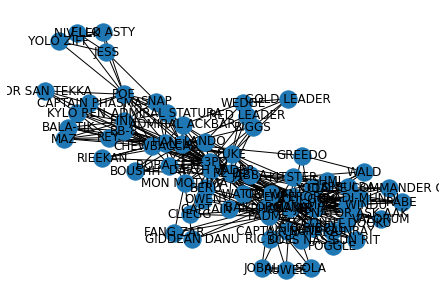

In [11]:
calculate_k_core(G, 4)

In [12]:
nx.pagerank(G, alpha=0.85)

{'R2-D2': 0.021334923476458552,
 'CHEWBACCA': 0.018691098969210174,
 'BB-8': 0.012593110869678915,
 'QUI-GON': 0.025487676653517307,
 'NUTE GUNRAY': 0.017451706043924688,
 'PK-4': 0.003349235899891576,
 'TC-14': 0.006716007893542931,
 'OBI-WAN': 0.03735360819305576,
 'DOFINE': 0.004785136243830215,
 'RUNE': 0.005611116245062187,
 'TEY HOW': 0.004824596492805294,
 'EMPEROR': 0.022336311645172247,
 'CAPTAIN PANAKA': 0.009037575153491694,
 'SIO BIBBLE': 0.00808765861767732,
 'JAR JAR': 0.023860960193401032,
 'TARPALS': 0.0021944955804412314,
 'BOSS NASS': 0.006335230228587825,
 'PADME': 0.03212155191344835,
 'RIC OLIE': 0.008020519914392833,
 'WATTO': 0.006209820092324614,
 'ANAKIN': 0.04072015629481485,
 'SEBULBA': 0.006311188710283622,
 'JIRA': 0.00377876479475976,
 'SHMI': 0.00804973299186149,
 'C-3PO': 0.033921462181338013,
 'DARTH MAUL': 0.005375610439581517,
 'KITSTER': 0.00891297177952955,
 'WALD': 0.005677340224448956,
 'FODE/BEED': 0.003829711118916763,
 'JABBA': 0.01370874236729

In [13]:
nx.degree_centrality(G)

{'R2-D2': 0.2072072072072072,
 'CHEWBACCA': 0.17117117117117117,
 'BB-8': 0.10810810810810811,
 'QUI-GON': 0.24324324324324323,
 'NUTE GUNRAY': 0.14414414414414414,
 'PK-4': 0.018018018018018018,
 'TC-14': 0.04504504504504504,
 'OBI-WAN': 0.3333333333333333,
 'DOFINE': 0.02702702702702703,
 'RUNE': 0.036036036036036036,
 'TEY HOW': 0.02702702702702703,
 'EMPEROR': 0.2072072072072072,
 'CAPTAIN PANAKA': 0.08108108108108109,
 'SIO BIBBLE': 0.07207207207207207,
 'JAR JAR': 0.21621621621621623,
 'TARPALS': 0.009009009009009009,
 'BOSS NASS': 0.05405405405405406,
 'PADME': 0.3063063063063063,
 'RIC OLIE': 0.06306306306306306,
 'WATTO': 0.05405405405405406,
 'ANAKIN': 0.3783783783783784,
 'SEBULBA': 0.05405405405405406,
 'JIRA': 0.02702702702702703,
 'SHMI': 0.07207207207207207,
 'C-3PO': 0.32432432432432434,
 'DARTH MAUL': 0.036036036036036036,
 'KITSTER': 0.08108108108108109,
 'WALD': 0.04504504504504504,
 'FODE/BEED': 0.02702702702702703,
 'JABBA': 0.12612612612612611,
 'GREEDO': 0.036036

In [14]:
# Compute graph transitivity, the fraction of all possible triangles present in G.
nx.transitivity(G)

0.365014164305949

In [15]:
# Compute the average clustering coefficient for the graph G.
nx.average_clustering(G)

0.6868025421339279

In [16]:
# Compute the number of triangles.
nx.triangles(G)

{'R2-D2': 98,
 'CHEWBACCA': 74,
 'BB-8': 33,
 'QUI-GON': 114,
 'NUTE GUNRAY': 40,
 'PK-4': 1,
 'TC-14': 5,
 'OBI-WAN': 145,
 'DOFINE': 2,
 'RUNE': 4,
 'TEY HOW': 2,
 'EMPEROR': 95,
 'CAPTAIN PANAKA': 30,
 'SIO BIBBLE': 26,
 'JAR JAR': 84,
 'TARPALS': 0,
 'BOSS NASS': 15,
 'PADME': 136,
 'RIC OLIE': 13,
 'WATTO': 15,
 'ANAKIN': 168,
 'SEBULBA': 15,
 'JIRA': 3,
 'SHMI': 23,
 'C-3PO': 153,
 'DARTH MAUL': 5,
 'KITSTER': 25,
 'WALD': 8,
 'FODE/BEED': 3,
 'JABBA': 38,
 'GREEDO': 3,
 'VALORUM': 6,
 'MACE WINDU': 51,
 'KI-ADI-MUNDI': 25,
 'YODA': 69,
 'RABE': 10,
 'BAIL ORGANA': 64,
 'GENERAL CEEL': 4,
 'BRAVO TWO': 3,
 'BRAVO THREE': 3,
 'CAPTAIN TYPHO': 13,
 'SENATOR ASK AAK': 17,
 'ORN FREE TAA': 3,
 'SOLA': 6,
 'JOBAL': 6,
 'RUWEE': 6,
 'TAUN WE': 4,
 'LAMA SU': 1,
 'BOBA FETT': 24,
 'JANGO FETT': 4,
 'OWEN': 18,
 'BERU': 21,
 'CLIEGG': 10,
 'COUNT DOOKU': 29,
 'SUN RIT': 15,
 'POGGLE': 15,
 'PLO KOON': 0,
 'ODD BALL': 1,
 'GENERAL GRIEVOUS': 3,
 'FANG ZAR': 6,
 'MON MOTHMA': 23,
 'GIDDEAN

In [17]:
nx.closeness_centrality(G, u=None, distance=None)

{'R2-D2': 0.5166303744502797,
 'CHEWBACCA': 0.48882963681169955,
 'BB-8': 0.3993003993003993,
 'QUI-GON': 0.4781096886360044,
 'NUTE GUNRAY': 0.41606491988171374,
 'PK-4': 0.3609569834735397,
 'TC-14': 0.3811503811503812,
 'OBI-WAN': 0.559020559020559,
 'DOFINE': 0.2962201331766549,
 'RUNE': 0.3438770000284196,
 'TEY HOW': 0.2954173685881003,
 'EMPEROR': 0.5023456636359862,
 'CAPTAIN PANAKA': 0.403737070403737,
 'SIO BIBBLE': 0.4052379517063532,
 'JAR JAR': 0.4342988406733427,
 'TARPALS': 0.3028028028028028,
 'BOSS NASS': 0.3963963963963964,
 'PADME': 0.4910315721126532,
 'RIC OLIE': 0.3935343285523791,
 'WATTO': 0.41291291291291293,
 'ANAKIN': 0.5505505505505506,
 'SEBULBA': 0.3893178893178893,
 'JIRA': 0.36457862544819064,
 'SHMI': 0.4022472657159004,
 'C-3PO': 0.5619021082938609,
 'DARTH MAUL': 0.3438770000284196,
 'KITSTER': 0.4241595681284397,
 'WALD': 0.37982233104184326,
 'FODE/BEED': 0.36336336336336333,
 'JABBA': 0.46386812344259154,
 'GREEDO': 0.41291291291291293,
 'VALORUM':

In [18]:
# Compute the squares clustering coefficient for nodes.
nx.square_clustering(G)

{'R2-D2': 0.1731694281133084,
 'CHEWBACCA': 0.18200885574458167,
 'BB-8': 0.2214095744680851,
 'QUI-GON': 0.1827404648773597,
 'NUTE GUNRAY': 0.1443458124276341,
 'PK-4': 0.05555555555555555,
 'TC-14': 0.12727272727272726,
 'OBI-WAN': 0.1244058128480239,
 'DOFINE': 0.11764705882352941,
 'RUNE': 0.14563106796116504,
 'TEY HOW': 0.125,
 'EMPEROR': 0.170530045769969,
 'CAPTAIN PANAKA': 0.29501267962806427,
 'SIO BIBBLE': 0.3294685990338164,
 'JAR JAR': 0.18506193381401367,
 'TARPALS': 0,
 'BOSS NASS': 0.37606837606837606,
 'PADME': 0.1560497894929526,
 'RIC OLIE': 0.22442748091603054,
 'WATTO': 0.3162251655629139,
 'ANAKIN': 0.13830534448630355,
 'SEBULBA': 0.32751937984496127,
 'JIRA': 0.552,
 'SHMI': 0.29430051813471503,
 'C-3PO': 0.13056804250102166,
 'DARTH MAUL': 0.1553398058252427,
 'KITSTER': 0.2545454545454545,
 'WALD': 0.255663430420712,
 'FODE/BEED': 0.2571428571428571,
 'JABBA': 0.17153661051907873,
 'GREEDO': 0.16049382716049382,
 'VALORUM': 0.39106145251396646,
 'MACE WINDU':

In [19]:
# Compute the generalized degree for nodes.
nx.generalized_degree(G)

{'R2-D2': Counter({2: 1,
          9: 4,
          15: 1,
          5: 3,
          3: 1,
          7: 1,
          10: 2,
          4: 2,
          8: 2,
          22: 1,
          13: 2,
          14: 1,
          6: 2}),
 'CHEWBACCA': Counter({8: 2,
          4: 4,
          18: 1,
          9: 3,
          6: 1,
          10: 1,
          13: 2,
          7: 3,
          3: 1,
          5: 1}),
 'BB-8': Counter({4: 3, 1: 2, 6: 2, 7: 2, 9: 2, 8: 1}),
 'QUI-GON': Counter({7: 4,
          3: 1,
          24: 1,
          2: 3,
          17: 2,
          6: 1,
          10: 2,
          9: 1,
          8: 2,
          14: 1,
          5: 3,
          11: 2,
          4: 3,
          19: 1}),
 'NUTE GUNRAY': Counter({5: 3, 9: 2, 6: 2, 2: 4, 10: 1, 3: 3, 8: 1}),
 'PK-4': Counter({1: 2}),
 'TC-14': Counter({3: 2, 1: 2, 2: 1}),
 'OBI-WAN': Counter({4: 2,
          9: 3,
          5: 5,
          1: 3,
          14: 3,
          7: 5,
          13: 1,
          11: 2,
          17: 2,
     

In [20]:
degree = nx.degree(G, weight = None)
weightedDegree = nx.degree(G, weight = None)
pagerank = nx.pagerank(G, weight = None)
betweenness = nx.betweenness_centrality(G, weight = None)

/opt/anaconda3/lib/python3.9/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0

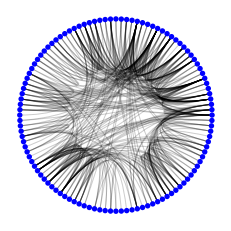

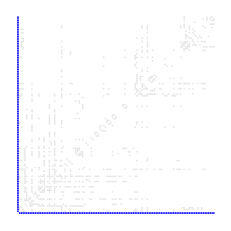

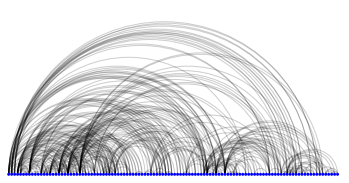

In [21]:
import nxviz as nv
import matplotlib.pyplot as plt
nv.CircosPlot(G)
plt.show()

nv.matrix(G)
plt.show()

nv.arc(G)
plt.show()

In [22]:
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)
    # Compute the maximum degree centrality: max_dc
    max_1_dc = max(list(deg_cent.values()))
    max_2_dc = list(sorted(deg_cent.values()))[-2]
    max_3_dc = list(sorted(deg_cent.values()))[-3]

    maxnode1 = set()
    maxnode2 = set()
    maxnode3 = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_1_dc:

            # Add the current node to the set of nodes
            maxnode1.add(k)
        if v == max_2_dc:

            # Add the current node to the set of nodes
            maxnode2.add(k)
        if v == max_3_dc:

            # Add the current node to the set of nodes
            maxnode3.add(k)

    return maxnode1,maxnode2,maxnode3

top_deg_dc,top2_deg_dc,top3_deg_dc = find_nodes_with_highest_deg_cent(G)
print(top_deg_dc,top2_deg_dc,top3_deg_dc)

{'ANAKIN'} {'OBI-WAN'} {'C-3PO'}


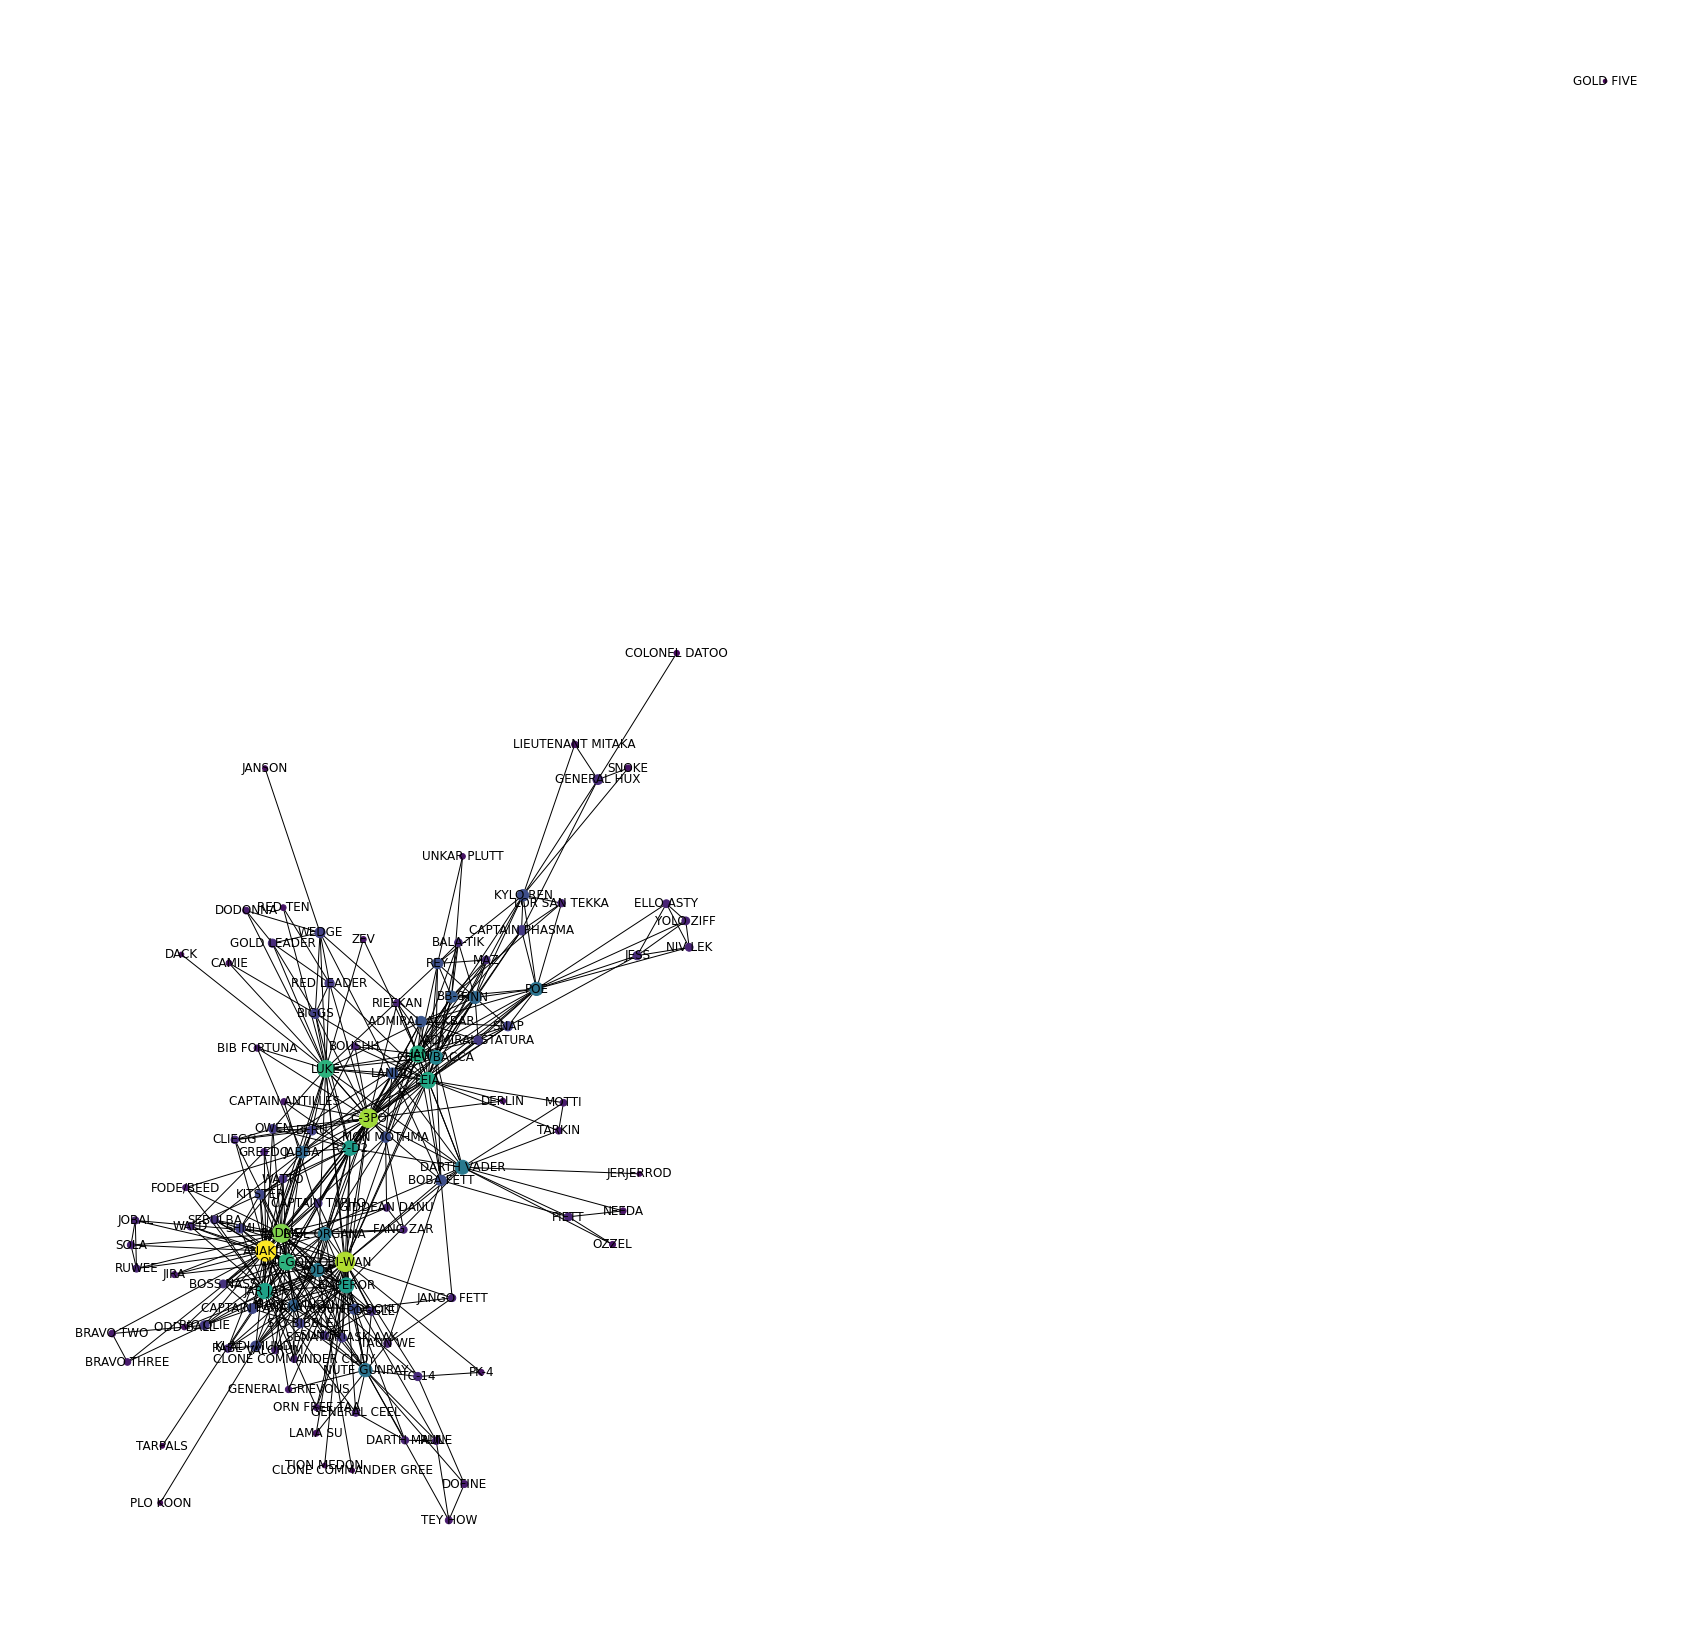

In [23]:
pos = nx.spring_layout(G)
# betCent = nx.betweenness_centrality(G, normalized=True, endpoints=True)
betCent = pagerank
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(30,30))
nx.draw_networkx(G, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size,)
plt.axis('off');

## combine all networks

two or more networks, ez way, store movie, show edges, add weight for copy, start with simple, focus on nodes first, add simple edges, then add some extra information, more code to check the network

In [24]:
#Get all files in the directory
data_list = []

for dirname, _, filenames in os.walk('/Users/chenningrui/Projects/4DV809/Star_Wars_Social_Network'):
    for filename in filenames:
         if 'json' in filename and "allCharacters" in filename and 'full' not in filename:
                json_path = os.path.join(dirname, filename)
                with open(json_path) as f:
                    data_list.append(json.load(f))
                
print(data_list)

[{'nodes': [{'name': 'R2-D2', 'value': 15, 'colour': '#bde0f6'}, {'name': 'CAPTAIN TYPHO', 'value': 5, 'colour': '#808080'}, {'name': 'EMPEROR', 'value': 7, 'colour': '#191970'}, {'name': 'SENATOR ASK AAK', 'value': 4, 'colour': '#808080'}, {'name': 'ORN FREE TAA', 'value': 4, 'colour': '#808080'}, {'name': 'MACE WINDU', 'value': 13, 'colour': '#808080'}, {'name': 'YODA', 'value': 13, 'colour': '#9ACD32'}, {'name': 'KI-ADI-MUNDI', 'value': 4, 'colour': '#808080'}, {'name': 'BAIL ORGANA', 'value': 4, 'colour': '#808080'}, {'name': 'JAR JAR', 'value': 7, 'colour': '#9a9a00'}, {'name': 'OBI-WAN', 'value': 34, 'colour': '#48D1CC'}, {'name': 'ANAKIN', 'value': 40, 'colour': '#ce3b59'}, {'name': 'PADME', 'value': 24, 'colour': '#DDA0DD'}, {'name': 'PK-4', 'value': 3, 'colour': '#808080'}, {'name': 'SIO BIBBLE', 'value': 3, 'colour': '#808080'}, {'name': 'SOLA', 'value': 4, 'colour': '#808080'}, {'name': 'JOBAL', 'value': 4, 'colour': '#808080'}, {'name': 'RUWEE', 'value': 5, 'colour': '#8080

In [25]:
G_ALL = nx.Graph()

#build graph nodes
for data in data_list:
    for node in data['nodes']:
        G_ALL.add_node(node['name'])
    
    #build graph edges
    for edge in data['links']:
        G_ALL.add_edge(data['nodes'][edge['source']]['name'], data['nodes'][edge['target']]['name'])

In [26]:
list(G_ALL)

print('density: ', nx.density(G_ALL))
print('is_weighted: ', nx.is_weighted(G_ALL))
print('info: ', nx.info(G_ALL))
print('degree: ', nx.degree(G_ALL))
print('pagerank: ', nx.pagerank(G_ALL, 
                  alpha=0.85, 
                  personalization=None, 
                  max_iter=100, 
                  tol=1e-06, 
                  nstart=None, 
                  weight='weight', 
                  dangling=None))

density:  0.07223294723294724
is_weighted:  False
info:  Graph with 112 nodes and 449 edges
degree:  [('R2-D2', 22), ('CAPTAIN TYPHO', 5), ('EMPEROR', 23), ('SENATOR ASK AAK', 7), ('ORN FREE TAA', 3), ('MACE WINDU', 13), ('YODA', 17), ('KI-ADI-MUNDI', 9), ('BAIL ORGANA', 17), ('JAR JAR', 24), ('OBI-WAN', 37), ('ANAKIN', 42), ('PADME', 34), ('PK-4', 2), ('SIO BIBBLE', 8), ('SOLA', 4), ('JOBAL', 4), ('RUWEE', 4), ('TAUN WE', 4), ('LAMA SU', 2), ('BOBA FETT', 10), ('JANGO FETT', 4), ('WATTO', 6), ('C-3PO', 36), ('OWEN', 7), ('BERU', 8), ('CLIEGG', 5), ('SHMI', 8), ('COUNT DOOKU', 10), ('SUN RIT', 6), ('POGGLE', 6), ('NUTE GUNRAY', 16), ('PLO KOON', 1), ('LUKE', 27), ('CHEWBACCA', 19), ('BB-8', 12), ('LOR SAN TEKKA', 4), ('POE', 16), ('KYLO REN', 10), ('CAPTAIN PHASMA', 7), ('FINN', 14), ('UNKAR PLUTT', 2), ('REY', 10), ('GENERAL HUX', 5), ('LIEUTENANT MITAKA', 2), ('HAN', 26), ('BALA-TIK', 5), ('SNOKE', 2), ('MAZ', 5), ('LEIA', 25), ('SNAP', 8), ('ADMIRAL ACKBAR', 11), ('ADMIRAL STATURA',

# community_louvain

In [27]:
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)
    # Compute the maximum degree centrality: max_dc
    max_1_dc = max(list(deg_cent.values()))
    max_2_dc = list(sorted(deg_cent.values()))[-2]
    max_3_dc = list(sorted(deg_cent.values()))[-3]

    maxnode1 = set()
    maxnode2 = set()
    maxnode3 = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_1_dc:

            # Add the current node to the set of nodes
            maxnode1.add(k)
        if v == max_2_dc:

            # Add the current node to the set of nodes
            maxnode2.add(k)
        if v == max_3_dc:

            # Add the current node to the set of nodes
            maxnode3.add(k)

    return maxnode1,maxnode2,maxnode3

top_deg_dc,top2_deg_dc,top3_deg_dc = find_nodes_with_highest_deg_cent(G_ALL)
print(top_deg_dc,top2_deg_dc,top3_deg_dc)

{'ANAKIN'} {'OBI-WAN'} {'C-3PO'}


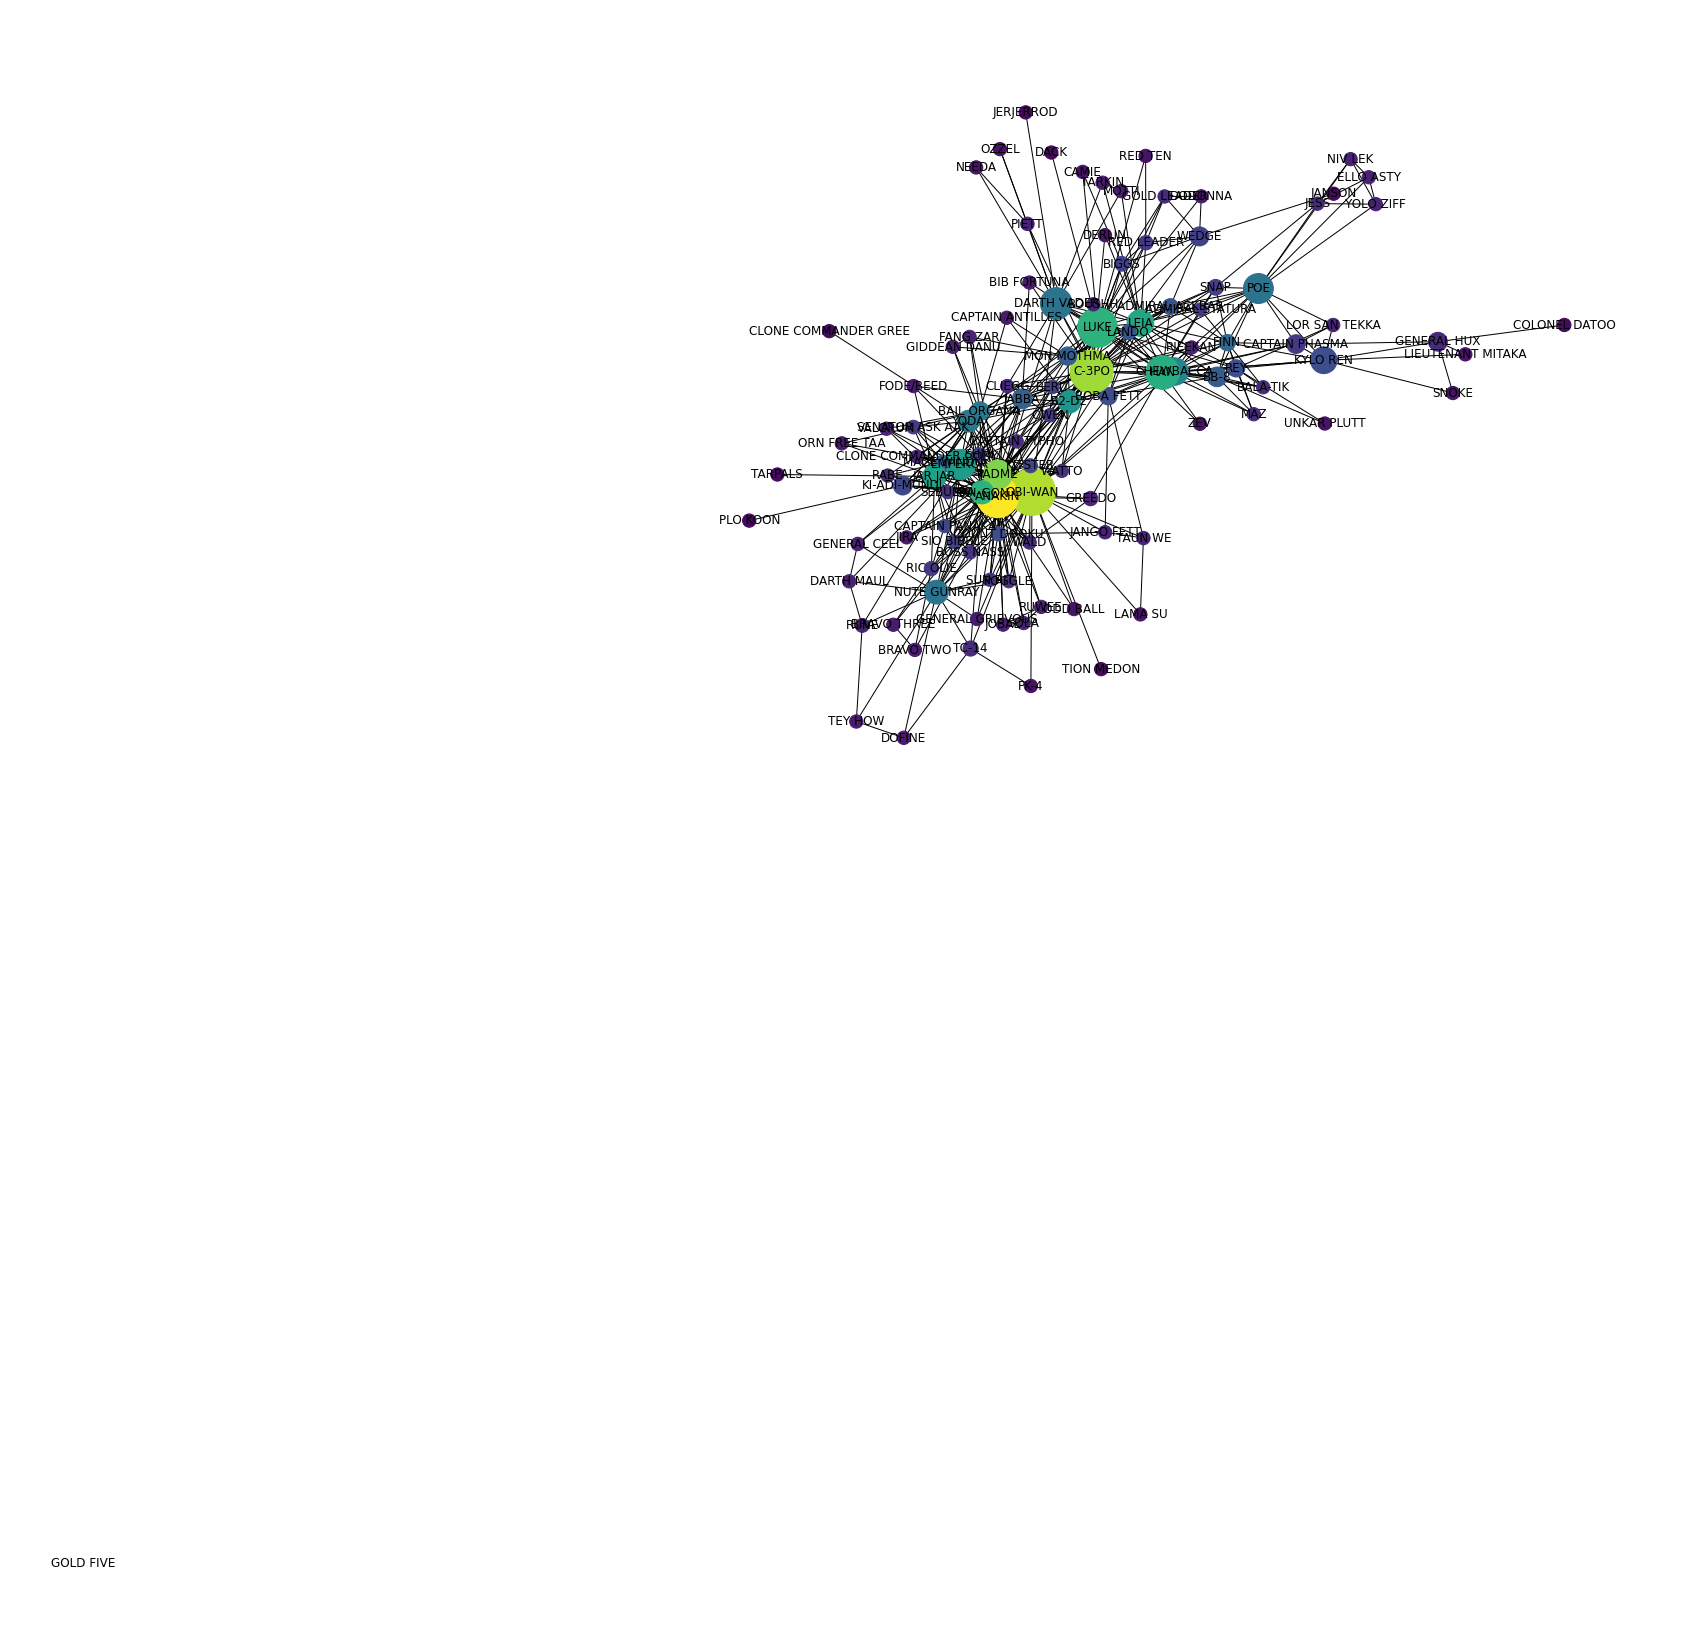

In [28]:
pos = nx.spring_layout(G_ALL)
betCent = nx.betweenness_centrality(G_ALL, normalized=True, endpoints=True)
node_color = [20000.0 * G_ALL.degree(v) for v in G_ALL]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(30,30))
nx.draw_networkx(G_ALL, pos=pos, with_labels=True,
                 node_color=node_color,
                 node_size=node_size,)
plt.axis('off');

In [29]:
cl = list(nx.find_cliques(G))
print(cl)

[['TARKIN', 'MOTTI', 'DARTH VADER', 'LEIA'], ['FANG ZAR', 'MON MOTHMA', 'BAIL ORGANA', 'PADME', 'GIDDEAN DANU'], ['VALORUM', 'BAIL ORGANA', 'EMPEROR', 'QUI-GON', 'JAR JAR'], ['CAPTAIN ANTILLES', 'R2-D2', 'BAIL ORGANA', 'C-3PO'], ['COLONEL DATOO', 'GENERAL HUX'], ['LOR SAN TEKKA', 'POE', 'CAPTAIN PHASMA', 'KYLO REN'], ['LOR SAN TEKKA', 'POE', 'BB-8'], ['JERJERROD', 'DARTH VADER'], ['DERLIN', 'LEIA', 'C-3PO'], ['BIGGS', 'LUKE', 'R2-D2', 'LEIA', 'C-3PO'], ['BIGGS', 'LUKE', 'RED LEADER', 'GOLD LEADER', 'WEDGE'], ['BIGGS', 'LUKE', 'RED LEADER', 'LEIA', 'C-3PO'], ['BIGGS', 'LUKE', 'CAMIE'], ['LIEUTENANT MITAKA', 'KYLO REN', 'GENERAL HUX'], ['HAN', 'GREEDO'], ['HAN', 'C-3PO', 'LEIA', 'MON MOTHMA', 'ADMIRAL ACKBAR', 'LANDO', 'LUKE'], ['HAN', 'C-3PO', 'LEIA', 'CHEWBACCA', 'BB-8', 'R2-D2'], ['HAN', 'C-3PO', 'LEIA', 'CHEWBACCA', 'BB-8', 'POE', 'FINN'], ['HAN', 'C-3PO', 'LEIA', 'CHEWBACCA', 'DARTH VADER', 'LANDO', 'R2-D2', 'LUKE'], ['HAN', 'C-3PO', 'LEIA', 'CHEWBACCA', 'DARTH VADER', 'LANDO', 'BOB

In [30]:
from networkx.algorithms import community

communities_generator = community.girvan_newman(G_ALL)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['ADMIRAL ACKBAR',
  'ADMIRAL STATURA',
  'BALA-TIK',
  'BB-8',
  'BERU',
  'BIB FORTUNA',
  'BIGGS',
  'BOBA FETT',
  'BOUSHH',
  'C-3PO',
  'CAMIE',
  'CAPTAIN ANTILLES',
  'CAPTAIN PHASMA',
  'CHEWBACCA',
  'DACK',
  'DARTH VADER',
  'DERLIN',
  'DODONNA',
  'ELLO ASTY',
  'FINN',
  'GOLD LEADER',
  'HAN',
  'JANSON',
  'JERJERROD',
  'JESS',
  'KYLO REN',
  'LANDO',
  'LEIA',
  'LOR SAN TEKKA',
  'LUKE',
  'MAZ',
  'MON MOTHMA',
  'MOTTI',
  'NEEDA',
  'NIV LEK',
  'OZZEL',
  'PIETT',
  'POE',
  'R2-D2',
  'RED LEADER',
  'RED TEN',
  'REY',
  'RIEEKAN',
  'SNAP',
  'TARKIN',
  'UNKAR PLUTT',
  'WEDGE',
  'YOLO ZIFF',
  'ZEV'],
 ['ANAKIN',
  'BAIL ORGANA',
  'BOSS NASS',
  'BRAVO THREE',
  'BRAVO TWO',
  'CAPTAIN PANAKA',
  'CAPTAIN TYPHO',
  'CLIEGG',
  'CLONE COMMANDER CODY',
  'CLONE COMMANDER GREE',
  'COUNT DOOKU',
  'DARTH MAUL',
  'DOFINE',
  'EMPEROR',
  'FANG ZAR',
  'FODE/BEED',
  'GENERAL CEEL',
  'GENERAL GRIEVOUS',
  'GIDDEAN DANU',
  'GREEDO',
  'JABBA',
  'JANGO FET

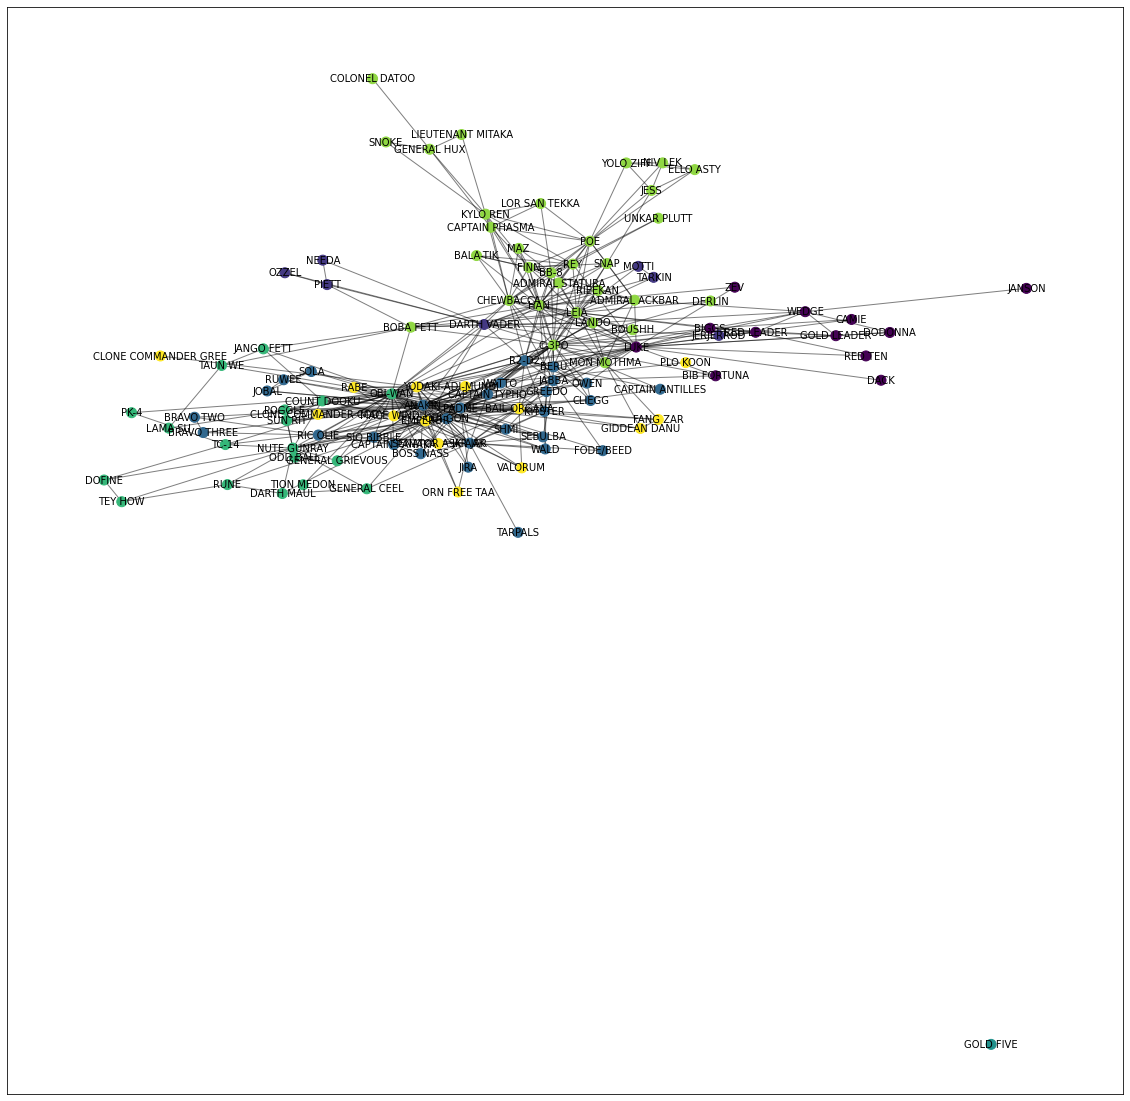

In [31]:
from community import community_louvain
import matplotlib.cm as cm

# compute the best partition
partition = community_louvain.best_partition(G)

# draw the graph
pos = nx.spring_layout(G)
plt.figure(1,figsize=(20,20))
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.show()

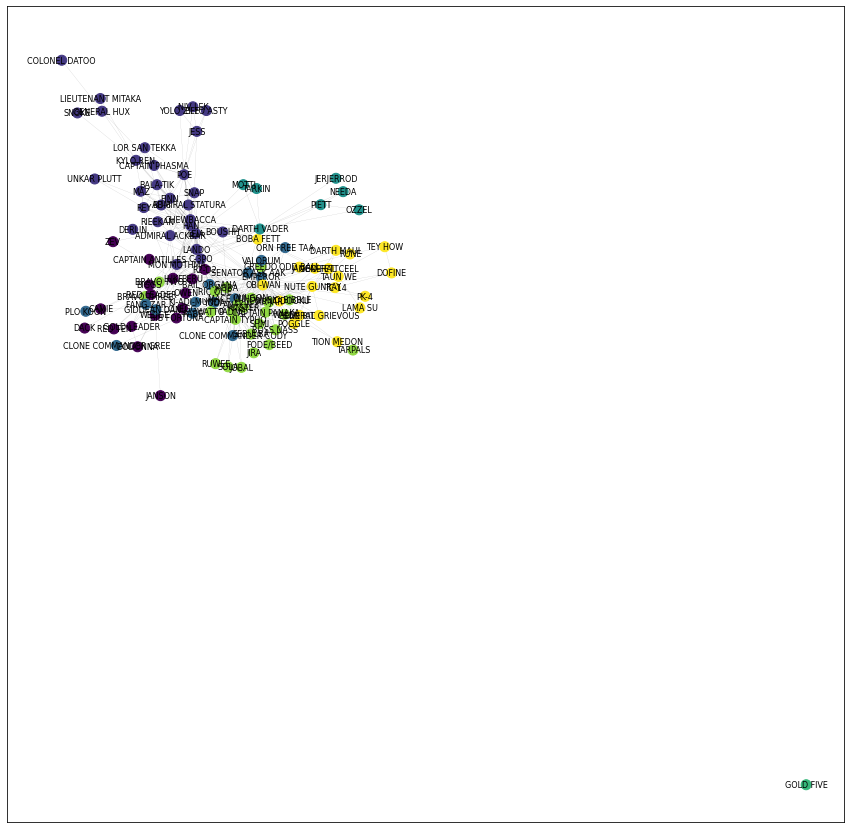

In [32]:
# compute the best partition
partition = community_louvain.best_partition(G_ALL)

# draw the graph
pos = nx.spring_layout(G_ALL)
plt.figure(1,figsize=(15,15))
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G_ALL, pos, partition.keys(), node_size=100,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G_ALL, pos, alpha=0.5, width=0.1)
nx.draw_networkx_labels(G_ALL, pos, font_size=8)
plt.show()

# Girvan-Newman

In [33]:
# find communities
girvan_newman_communities_all = list(girvan_newman(G_ALL))
girvan_newman_communities = list(girvan_newman(G))

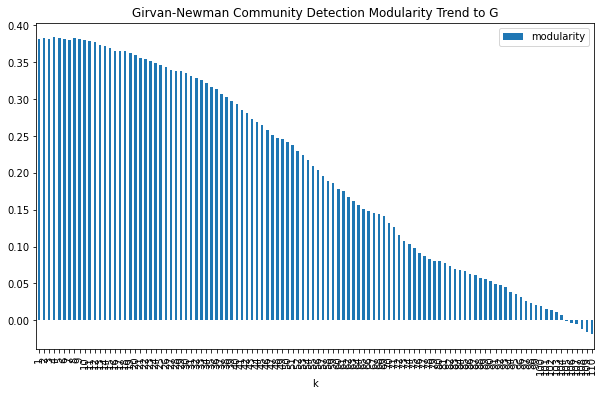

In [34]:
modularity_df = pd.DataFrame([[k+1, round(nx_comm.modularity(G, girvan_newman_communities[k]), 6)]
                for k in range(len(girvan_newman_communities))],
                            columns=["k", "modularity"])
modularity_df.plot.bar(x="k", figsize=(10,6), title="Girvan-Newman Community Detection Modularity Trend to G");

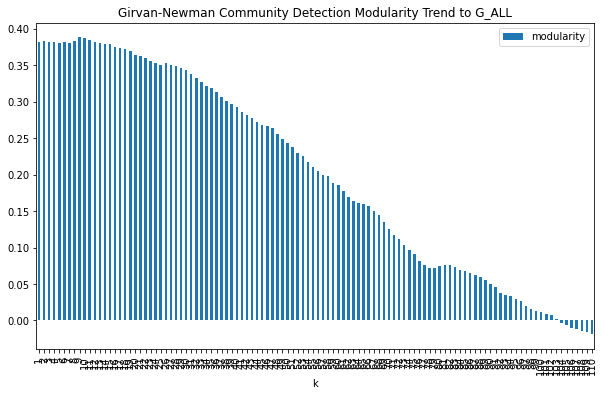

In [35]:
modularity_df = pd.DataFrame([[k+1, round(nx_comm.modularity(G_ALL, girvan_newman_communities_all[k]), 6)]
                for k in range(len(girvan_newman_communities_all))],
                            columns=["k", "modularity"])
modularity_df.plot.bar(x="k", figsize=(10,6), title="Girvan-Newman Community Detection Modularity Trend to G_ALL");

In [36]:
# function create node color list for less than 7 communities
# when there are more than 6 colors, visualization can be confusing for human
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    
    colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"][:number_of_colors]
    node_colors = []
    
    # iterate each node in the graph and find which community it belongs to
    # if the current node is found at a specific community, add color to the 
    # node_colors list
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors

In [37]:
def visualize_communities(graph, communities):
    # create visualization
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx_comm.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, 
                           k=0.3, iterations=50,
                           seed=2)

    plt.figure(1,figsize=(10,6)) 
    nx.draw(graph,
            pos = pos,
            node_size=1000,
            node_color=node_colors,
            with_labels=True,
            font_size = 10,
            font_color='black')
    plt.title(title)
    plt.show() 

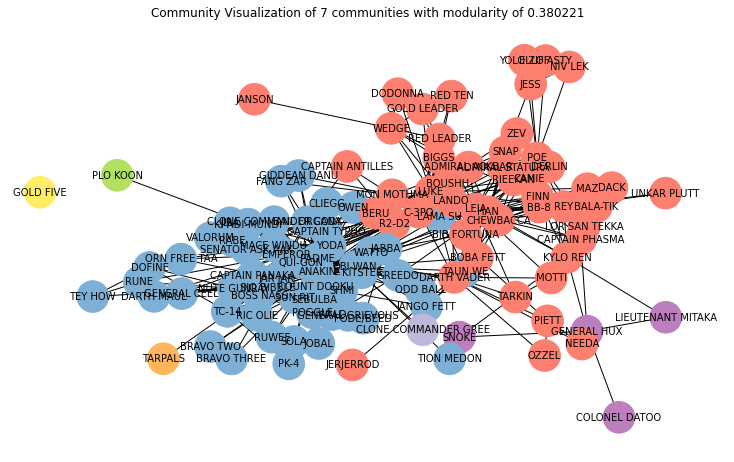

In [38]:
visualize_communities(G_ALL, girvan_newman_communities_all[4])

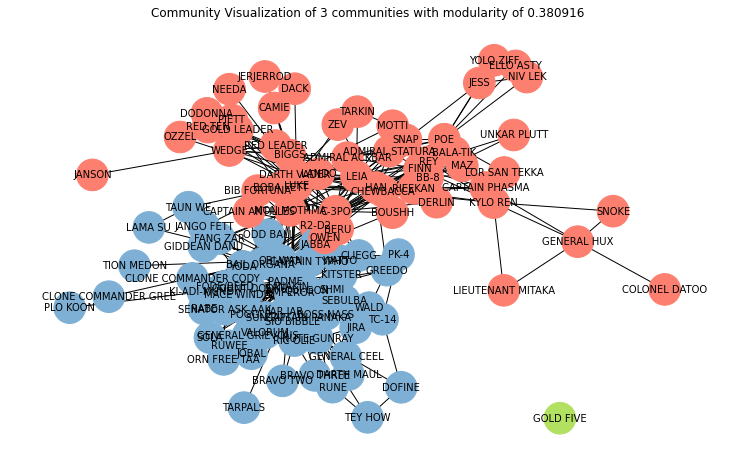

In [39]:
visualize_communities(G, girvan_newman_communities[0])

# Label Propagation

In [40]:
from networkx.algorithms.community.label_propagation import label_propagation_communities

In [41]:
# find communities
label_prop_communities_all = list(label_propagation_communities(G_ALL))
label_prop_communities = list(label_propagation_communities(G))

print(label_prop_communities_all)
print()
print(label_prop_communities)

[{'TARKIN', 'FANG ZAR', 'DARTH VADER', 'SUN RIT', 'COUNT DOOKU', 'SOLA', 'MACE WINDU', 'JOBAL', 'GREEDO', 'C-3PO', 'DOFINE', 'KYLO REN', 'FODE/BEED', 'BALA-TIK', 'SENATOR ASK AAK', 'JABBA', 'CAPTAIN PHASMA', 'YODA', 'TAUN WE', 'LUKE', 'WATTO', 'RUNE', 'SHMI', 'LOR SAN TEKKA', 'ODD BALL', 'DERLIN', 'HAN', 'BOUSHH', 'REY', 'PLO KOON', 'RUWEE', 'BAIL ORGANA', 'PK-4', 'RIEEKAN', 'CAPTAIN TYPHO', 'GIDDEAN DANU', 'ADMIRAL ACKBAR', 'FINN', 'BOSS NASS', 'CLIEGG', 'ORN FREE TAA', 'PADME', 'SIO BIBBLE', 'POGGLE', 'LEIA', 'RIC OLIE', 'RABE', 'SNAP', 'JIRA', 'DARTH MAUL', 'KI-ADI-MUNDI', 'VALORUM', 'CAPTAIN ANTILLES', 'JERJERROD', 'QUI-GON', 'GENERAL GRIEVOUS', 'KITSTER', 'TION MEDON', 'ANAKIN', 'TARPALS', 'CLONE COMMANDER GREE', 'BB-8', 'JANGO FETT', 'SEBULBA', 'CLONE COMMANDER CODY', 'DACK', 'OWEN', 'JAR JAR', 'R2-D2', 'ADMIRAL STATURA', 'EMPEROR', 'LAMA SU', 'TEY HOW', 'TC-14', 'WALD', 'POE', 'ZEV', 'LANDO', 'MOTTI', 'GENERAL CEEL', 'BIB FORTUNA', 'MON MOTHMA', 'CHEWBACCA', 'NUTE GUNRAY', 'BOBA

In [42]:
colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

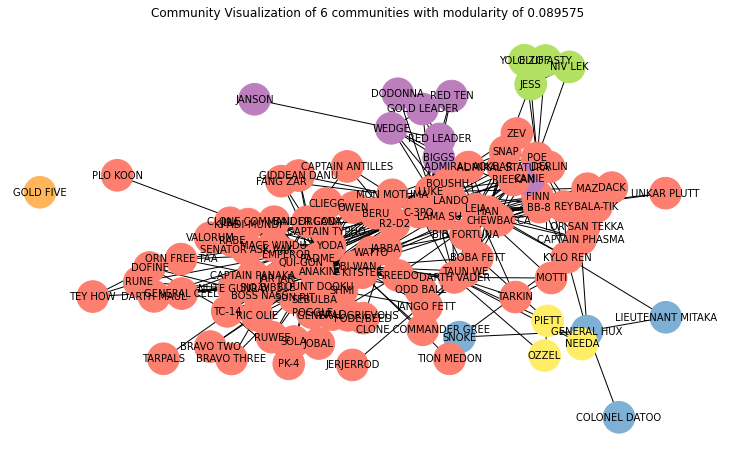

In [43]:
visualize_communities(G_ALL, label_prop_communities_all)

In [44]:
def visualize_subgraph(graph, subgraph_nodes, node_color):
    # get subgraph
    subgraph = nx.subgraph(graph, subgraph_nodes)

    # create visualization
    node_colors = [node_color] * len(subgraph_nodes)
    title = f"Community Partition Subgraph"
    pos = nx.spring_layout(subgraph, 
                           k=0.3, iterations=50,
                           seed=2)

    plt.figure(1,figsize=(8,6)) 
    nx.draw(subgraph,
            pos = pos,
            node_size=1000,
            node_color=node_colors,
            with_labels=True,
            font_size = 20,
            font_color='black')
    plt.title(title)
    plt.show() 


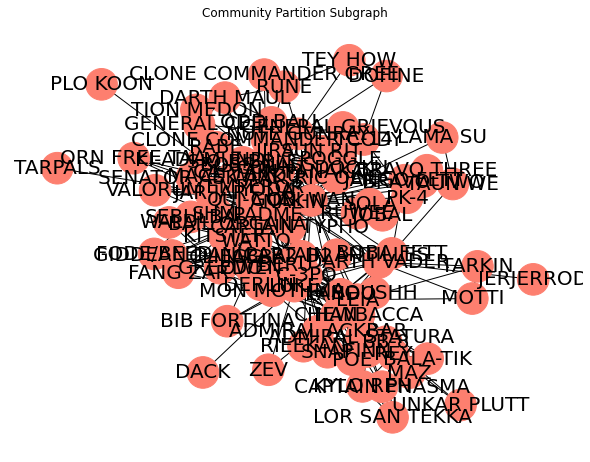

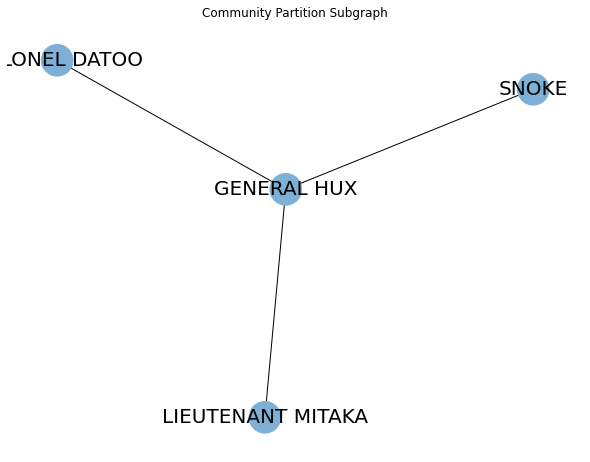

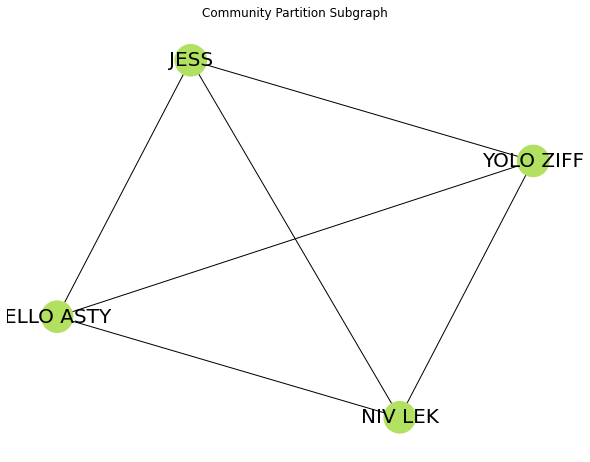

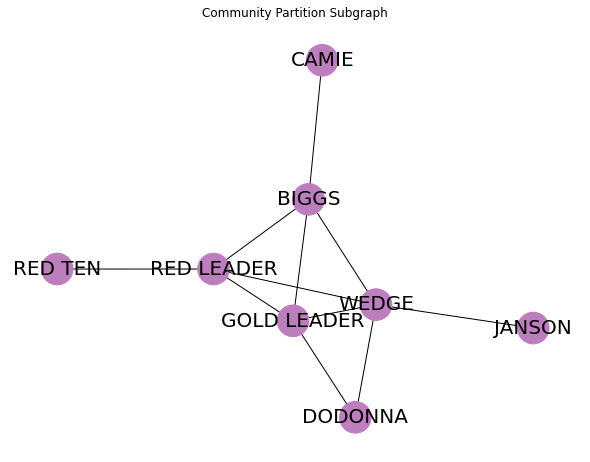

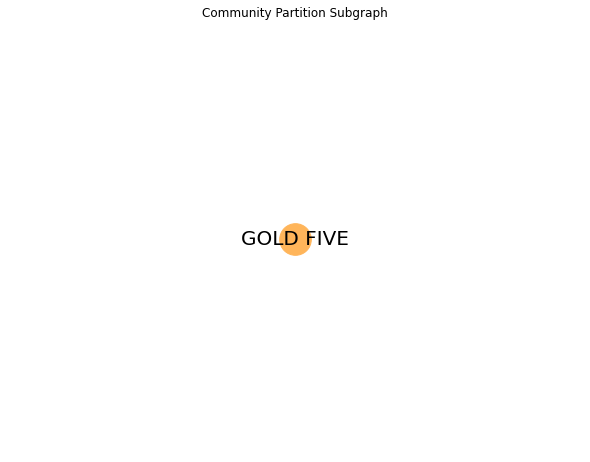

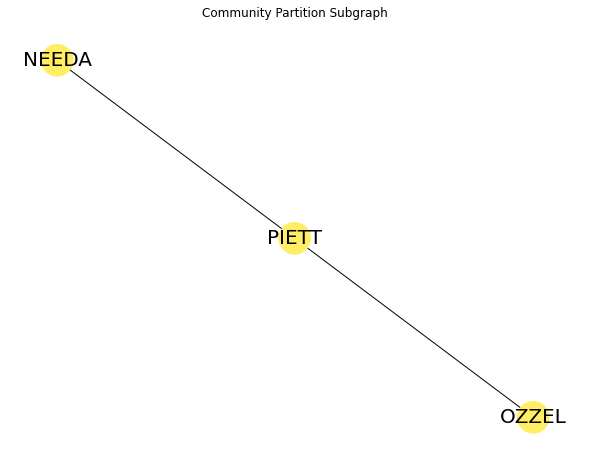

In [45]:
for i in range(len(label_prop_communities_all)):
    visualize_subgraph(G_ALL, label_prop_communities_all[i], colors[i])

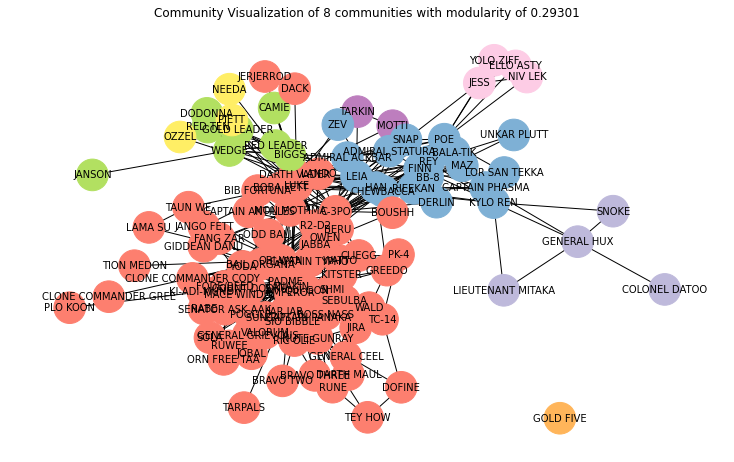

In [46]:
visualize_communities(G, label_prop_communities)

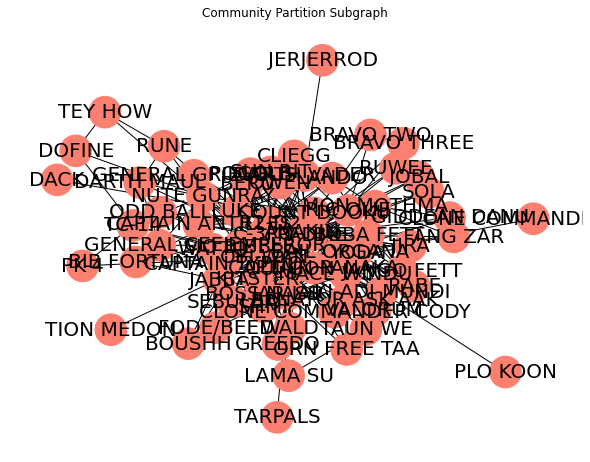

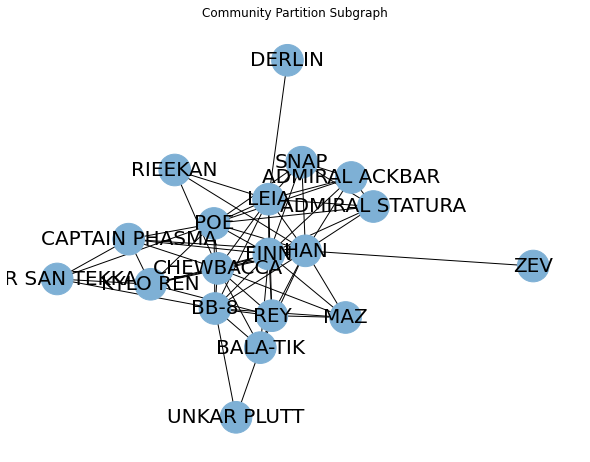

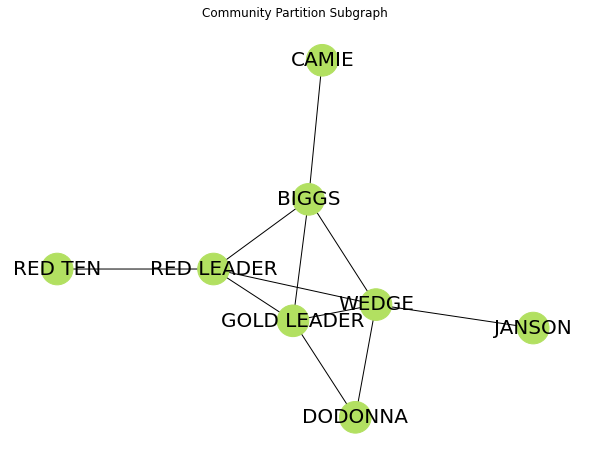

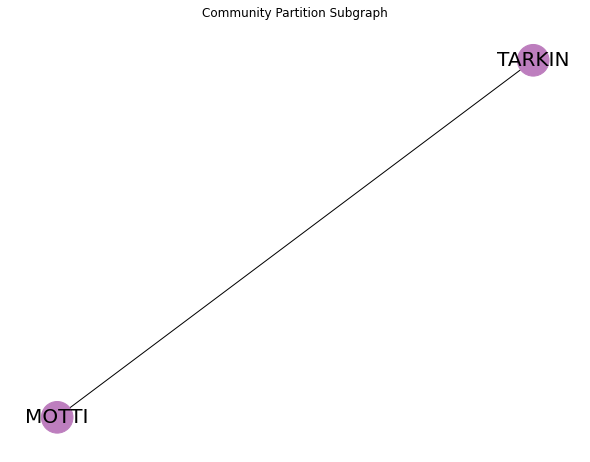

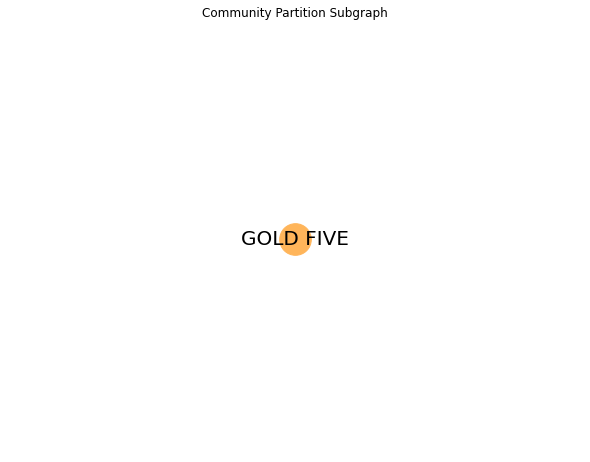

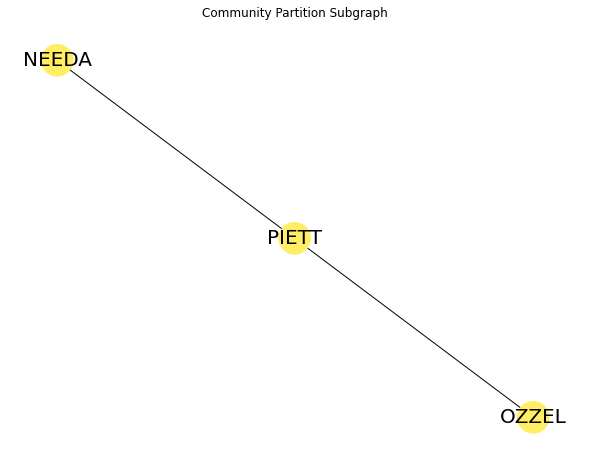

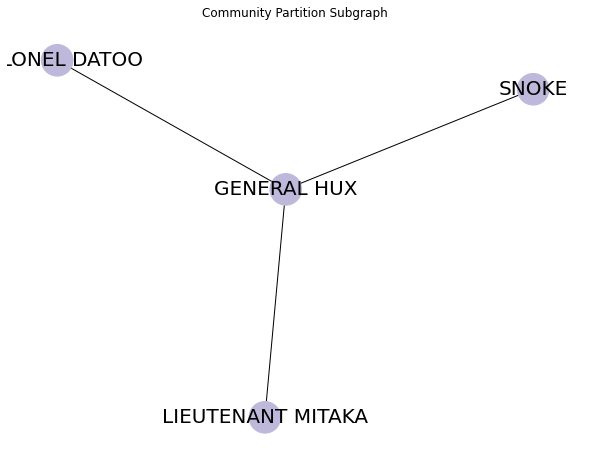

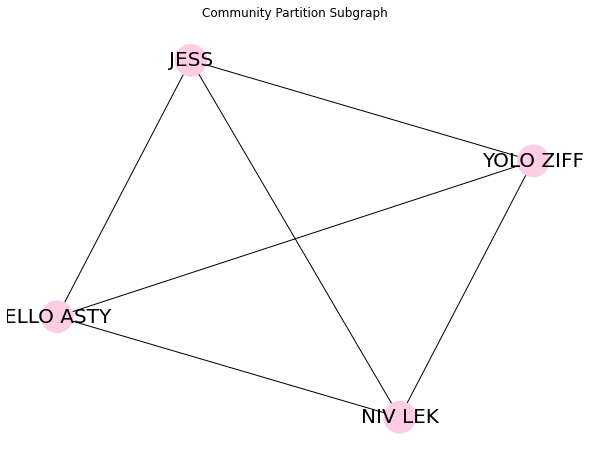

In [47]:
for i in range(len(label_prop_communities)):
    visualize_subgraph(G, label_prop_communities[i], colors[i])

# Resource

In [48]:
import re

#Get all files in the directory
fLists = []

for dirname, _, filenames in os.walk('/Users/chenningrui/Projects/4DV809/Star_Wars_Social_Network'):
    for filename in filenames:
         if 'json' in filename and "allCharacters" in filename and 'full' not in filename:
                json_path = os.path.join(dirname, filename)
                with open(json_path) as f:
                    index = (int([float(s) for s in re.findall(r'-?\d+\.?\d*', str(json_path))][2] * -1))
                    fLists.insert(index - 1, json_path);
                    
print(fLists)

['/Users/chenningrui/Projects/4DV809/Star_Wars_Social_Network/starwars-episode-1-interactions-allCharacters.json', '/Users/chenningrui/Projects/4DV809/Star_Wars_Social_Network/starwars-episode-2-interactions-allCharacters.json', '/Users/chenningrui/Projects/4DV809/Star_Wars_Social_Network/starwars-episode-3-interactions-allCharacters.json', '/Users/chenningrui/Projects/4DV809/Star_Wars_Social_Network/starwars-episode-7-interactions-allCharacters.json', '/Users/chenningrui/Projects/4DV809/Star_Wars_Social_Network/starwars-episode-4-interactions-allCharacters.json', '/Users/chenningrui/Projects/4DV809/Star_Wars_Social_Network/starwars-episode-5-interactions-allCharacters.json', '/Users/chenningrui/Projects/4DV809/Star_Wars_Social_Network/starwars-episode-6-interactions-allCharacters.json']


# different combinitions

In [49]:
# dfs
def subsets(files):
    if len(files) <= 0:
        return []
    
    res = []
    
    def dfs(file, path):
        if(len(path) > 0):
            res.append(path.copy())
        for i in range(len(file)):
            path.append(file[i])
            dfs(file[i + 1:], path)
            path.pop()
            
    dfs(files, [])
    
    return res

pathsets = subsets(fLists)

In [50]:
networks = []
    
for paths in pathsets:
    network = []
    key = ''
    for path in paths:
        json_path = os.path.join(path)
        with open(json_path) as f:
            index = (int([float(s) for s in re.findall(r'-?\d+\.?\d*', str(json_path))][2] * -1))
            network.append(json.load(f))
            key += str(index)
    key = sorted(list(key))
    key = "".join(str(x) for x in key)
    networks.append({'key': key, 'val': network})

In [51]:
gSets = []

for net in networks:
    g = nx.Graph()
    for data in net['val']:
        for node in data['nodes']:
            g.add_node(node['name'])
    
        for edge in data['links']:
            g.add_edge(data['nodes'][edge['source']]['name'], data['nodes'][edge['target']]['name'])
    gSets.append({'key': net['key'], 'val': g})

In [52]:
res = []
for data in gSets:
    density = nx.density(data['val'])
    closeness_centrality = nx.closeness_centrality(data['val'])
    degree_centrality = nx.degree_centrality(data['val'])
    is_weighted = nx.is_weighted(data['val'])
    edge = nx.number_of_edges(data['val'])
    node = nx.number_of_nodes(data['val'])
    degree = nx.degree(data['val'])
    pagerank = nx.pagerank(data['val'])
    betweenness = nx.betweenness_centrality(data['val'], normalized=True, endpoints=True)
    louvain_partition = community_louvain.best_partition(data['val'])
    label_propagation = str(list(label_propagation_communities(data['val'])))
    triangles = nx.triangles(data['val'])
    corek2 = nx.k_core(data['val'], k=2)
    corek2_core = nx.spring_layout(corek2)
    corek4 = nx.k_core(data['val'], k=4)
    corek4_core = nx.spring_layout(corek4)
    corek6 = nx.k_core(data['val'], k=6)
    corek6_core = nx.spring_layout(corek6)
    edgeList = nx.edges(data['val'])
    nodeList = nx.nodes(data['val'])
    res.append({'key': data['key'], 'density': density, 'degree_centrality': degree_centrality, 'is_weighted': is_weighted,
               'edge': str(edge), 'node': str(node), 'degree': list(degree), 'pagerank': list(pagerank.items()),
               'betweenness': list(list(betweenness.items())), 'louvain_partition': louvain_partition,
               'label_propagation': label_propagation, 'corek2': list(corek2_core),'corek4': list(corek4_core),
               'corek6': list(corek6_core),'edgeList': list(edgeList),'closeness_centrality': closeness_centrality,
               'nodeList': list(nodeList)})
    
    

In [53]:
def getDataByKey(key):
    for data in res:
        if data['key'] == key:
            return data
    return ''

# Flask

In [ ]:
app = Flask(__name__)
CORS(app)

@app.route('/')
def connectSuccess():
    return jsonify(res);
#     return json.dumps(res.toList());
    return 'okay'

@app.route('/getDataByKey', methods = ['POST'])
def getClustering():
    if request.method == 'POST':
        key = request.json['key']
        return getDataByKey(str(key))

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [28/May/2022 13:46:21] "OPTIONS /getDataByKey HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2022 13:46:21] "OPTIONS /getDataByKey HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2022 13:46:21] "OPTIONS /getDataByKey HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2022 13:46:21] "OPTIONS /getDataByKey HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2022 13:46:21] "POST /getDataByKey HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2022 13:46:21] "POST /getDataByKey HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2022 13:46:21] "POST /getDataByKey HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2022 13:46:21] "POST /getDataByKey HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2022 13:47:02] "POST /getDataByKey HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2022 13:47:06] "OPTIONS /getDataByKey HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2022 13:47:06] "OPTIONS /getDataByKey HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2022 13:47:06] "OPTIONS /getDataByKey HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2022 13:47:06] "OPTIO